In [88]:
include("../code/headers.jl")

In [89]:
seed = 1234
n = factorial(5)
R = 0.21:0.01:0.81
m_ = n*(1 .- R)
nrates = length(m_)
m = round.(Int,m_);

In [90]:
res_MS = Vector{BPResults{MS}}(undef,nrates)
res_OC = Vector{OptimalCycleResults}(undef,nrates)
free_energies = zeros(nrates)
ms = MS(maxiter=10000, convergence=:messages, Tmax=1, gamma=0.0, sigma=1e-10, tol=0.0)
oc = OptimalCycle()
for j in eachindex(m)
    println("## Rate $(round(R[j],digits=2)). $j of $(length(m))")
    lm = LossyModel(Val(2), n, m[j], randseed=seed)
    breduction!(lm)
    res_MS[j] = solve!(lm, ms, randseed=seed, verbose=true, showprogress=false)
    free_energies[j] = free_energy(lm.fg)
    refresh!(lm, randseed=seed)
    res_OC[j] = solve!(lm, oc, randseed=seed, verbose=true, showprogress=false)
end

## Rate 0.21. 1 of 61
## Rate 0.22. 2 of 61
## Rate 0.23. 3 of 61
## Rate 0.24. 4 of 61
## Rate 0.25. 5 of 61
## Rate 0.26. 6 of 61
## Rate 0.27. 7 of 61
## Rate 0.28. 8 of 61
## Rate 0.29. 9 of 61
## Rate 0.3. 10 of 61
## Rate 0.31. 11 of 61
## Rate 0.32. 12 of 61
## Rate 0.33. 13 of 61
## Rate 0.34. 14 of 61
## Rate 0.35. 15 of 61
## Rate 0.36. 16 of 61
## Rate 0.37. 17 of 61
## Rate 0.38. 18 of 61
## Rate 0.39. 19 of 61
## Rate 0.4. 20 of 61
## Rate 0.41. 21 of 61
## Rate 0.42. 22 of 61
## Rate 0.43. 23 of 61
## Rate 0.44. 24 of 61
## Rate 0.45. 25 of 61
## Rate 0.46. 26 of 61
## Rate 0.47. 27 of 61
## Rate 0.48. 28 of 61
## Rate 0.49. 29 of 61
## Rate 0.5. 30 of 61
## Rate 0.51. 31 of 61
## Rate 0.52. 32 of 61
## Rate 0.53. 33 of 61
## Rate 0.54. 34 of 61
## Rate 0.55. 35 of 61
## Rate 0.56. 36 of 61
## Rate 0.57. 37 of 61
## Rate 0.58. 38 of 61
## Rate 0.59. 39 of 61
## Rate 0.6. 40 of 61
## Rate 0.61. 41 of 61
## Rate 0.62. 42 of 61
## Rate 0.63. 43 of 61
## Rate 0.64. 44 of 61
#

In [93]:
dist_oc = distortion(res_OC)
converged = [res.converged for res in res_MS]
findall(converged)

4-element Array{Int64,1}:
 12
 13
 15
 29

In [94]:
j = 12
lm = LossyModel(Val(2), n, m[j], randseed=seed)
breduction!(lm)
res_MS[j] = solve!(lm, ms, randseed=seed, verbose=true, showprogress=false)

BPResults{MS}
  converged: Bool true
  parity: Int64 0
  distortion: Float64 0.21666666666666667
  trials: Int64 1
  iterations: Int64 70
  maxdiff: Array{Float64}((10000,)) [2.0000000001001927, 2.9999999997916613, 2.9999999994814153, 2.999999999473241, 2.999999999833281, 2.999999999448462, 2.999999999679722, 2.999999999710761, 2.999999999710761, 2.999999999710761  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
  codeword: BitArray{1}
  maxchange: Array{Float64}((10000,)) [2.0000000001001927, 2.0000000001001927, 1.9999999998855496, 1.9999999998855496, 1.9999999998855496, 1.0000000002663727, 1.000000000266373, 0.9999999998985922, 0.9999999994127757, 0.9999999994127757  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [96]:
x = guesses(lm.fg)
y = lm.y
[distortion(lm) dist_oc[j]]

1×2 Array{Float64,2}:
 0.216667  0.216667

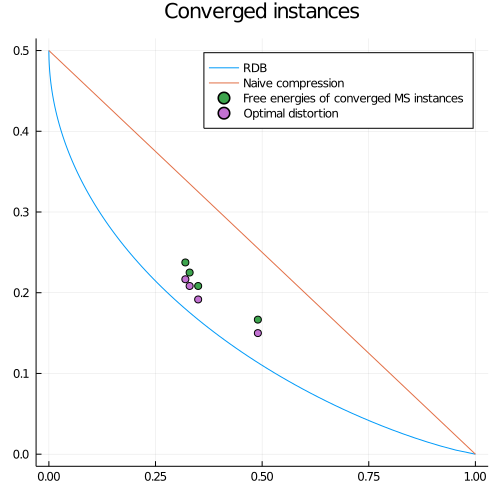

In [92]:
d = LinRange(0,0.5,100)
r = LinRange(0, 1, 100)
pl = Plots.plot(rdb.(d), d, label="RDB", size=(500,500))
Plots.plot!(pl, r, naive_compression_inv.(r), label="Naive compression")

scatter!(pl, R[converged], free_energies[converged] /n, label="Free energies of converged MS instances")
scatter!(pl, R[converged], dist_oc[converged], label="Optimal distortion")
title!(pl, "Converged instances")

Compare distortions computed with free energy (left) and optimal cycle algo (right)

In [57]:
[free_energies[converged]/n dist_oc[converged]]

36×2 Array{Float64,2}:
 0.258333   0.258333
 0.25       0.25
 0.233333   0.233333
 0.25       0.258333
 0.25       0.258333
 0.233333   0.233333
 0.233333   0.233333
 0.225      0.225
 0.2        0.2
 0.191667   0.191667
 0.183333   0.183333
 0.183333   0.183333
 0.166667   0.166667
 ⋮          
 0.0833333  0.0916667
 0.0833333  0.0916667
 0.075      0.075
 0.0916667  0.108333
 0.075      0.0833333
 0.0666667  0.0833333
 0.0666667  0.0833333
 0.05       0.05
 0.0583333  0.0583333
 0.05       0.075
 0.0416667  0.05
 0.0416667  0.05